<a href="https://colab.research.google.com/github/aaubs/ds-master/blob/main/notebooks/M3_Workshop_2_transformer_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Part 1: SBERT and Semantic Search

## Using SBERT for Semantic Embeddings

SBERT (Sentence-BERT) is a modification of the pre-trained BERT network that uses siamese and triplet network structures to derive semantically meanigful sentence embeddings that can be compared using cosine similarity. This is particularly useful for semantic search tasks where the goal is to find the content most relevant to the query's meaning, not just the specific words.

The goal of this notebook is to give you a very simple example so that you can understand where you add more complex layers to your assignment.



## Setting Up Your Environment
Ensure you have the relevant libraries installed mainly "sentence-transformers"

In [2]:
!pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.8/132.8 kB 1.4 MB/s eta 0:00:00


##Loading the SBERT Model


In [3]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

## Preparing your Dataset
For our semantic search engine, we'll need a dataset. This could be a databse of documents, product descriptions or any text corpus relevant to your idea.

In [6]:
documents = [
    "The Eiffel Tower is located in Paris",
    "The Statue of Liberty is in New York City",
    "The Colosseum is in Rome, Italy"
]


## Generating Embeddings
Next, we convert our text data into embeddings. These embeddings represent our sentences in a high-dimensional space, capturing their semantic meaning

In [5]:
doc_embeddings = model.encode(documents)


## Implementating the Search Function
Let's implement a function to perform semantic search. This function will take a query, encode it and find the most semantically similar document in our dataset.

In [8]:
from sentence_transformers import util
import numpy as np

def semantic_search(query, doc_embeddings, documents):
  query_embedding= model.encode(query)
  cosine_similarities = util.pytorch_cos_sim(query_embedding, doc_embeddings)[0]
  closest = np.argmax(cosine_similarities)
  return documents[closest]

## Testing Your Semantic Search Engine
Test it before you make it look all cute with a gradio/Streamlit

In [9]:
query = "Historical landmarks in France"
result = semantic_search(query, doc_embeddings, documents)
print(f"Query: {query}\nBest match: {result}")

Query: Historical landmarks in France
Best match: The Eiffel Tower is located in Paris


## Implementing a Basic Attention Mechanism
Due to the complexity of implementing a full attention mechanism from scratch and the need for a suitable dataset and model, this section will guide you through a conceptual understanding and point you towards using existing libraries to explore attention mechanisms.

## Understanding Attention
The key idea behind attention is that it calculates a werighted summ of all input features, where the weights are learned dynamically and depend on the input itself.

## Libraries for Exploring Attention
The 'transformers' library HF provides models with attention mechanisms already implemented. Also so many datasets that might be interesting.

In [15]:
!pip install transformers matplotlib


In [23]:
from transformers import BertTokenizer, BertModel
import torch
import matplotlib.pyplot as plt
import numpy as np

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased', output_attentions=True)

# Encode text
text = "The cat that the dog chased was black"
inputs = tokenizer(text, return_tensors="pt")

# Get model output
with torch.no_grad():
    outputs = model(**inputs)

# Extract attentions
attentions = outputs.attentions  # Tuple of 12 (one per layer) matrices of shape (batch_size, num_heads, sequence_length, sequence_length)

# For simplicity, we'll use the attention weights from the first layer and the first head.
attention = attentions[0][0, 0, :, :].detach().numpy()

# Tokenize the text to match tokens with attention weights
tokens = tokenizer.tokenize(tokenizer.decode(inputs['input_ids'][0]))

<ipython-input-24-626899cbf548>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + tokens, rotation=90)
<ipython-input-24-626899cbf548>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + tokens)


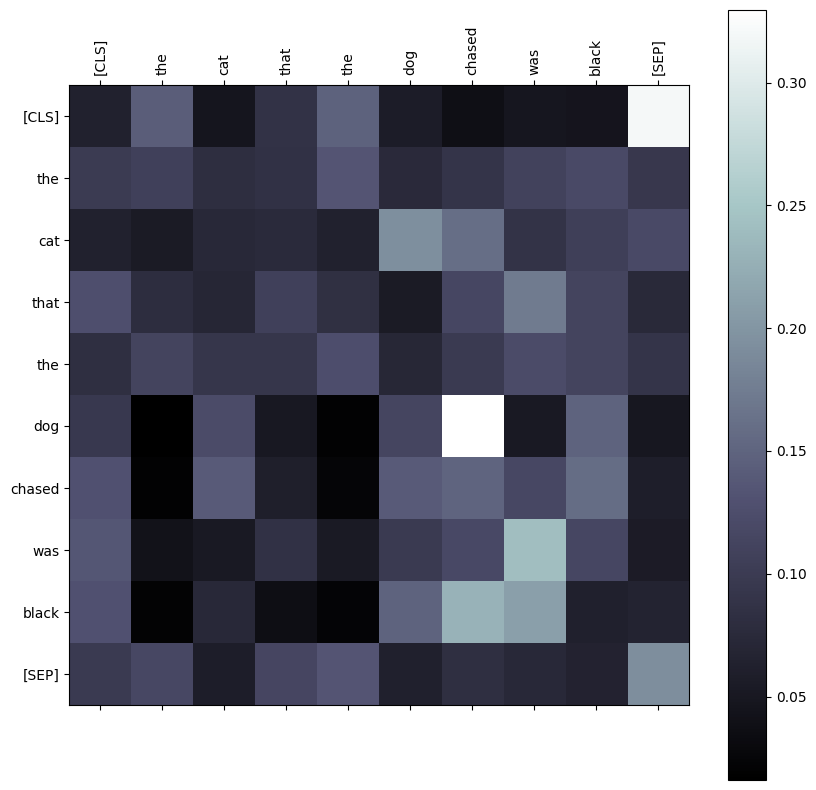

In [24]:
# Visualizing the attention weights
fig, ax = plt.subplots(figsize=(10, 10))
cax = ax.matshow(attention, cmap='bone')
fig.colorbar(cax)

# Set up axes
ax.set_xticklabels([''] + tokens, rotation=90)
ax.set_yticklabels([''] + tokens)

# Show labels at every tick
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(1))

plt.show()